In [4]:
import itertools as it
import numpy as np 
import matplotlib.pyplot as plt 


def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

In [235]:
def Pi(coordinates):
    inhom = coordinates[:-1]/coordinates[-1]
    return inhom 

def PiInv(coordinate):
    """input: inhom coordinates
    returns: homogenous coordinates"""  
    if coordinate.shape[1] is not None:

        w = np.ones((1,coordinate.shape[1]))
    else:

        w = 1

    hom = np.vstack((coordinate,w))

    return hom 

In [221]:
def project_points(K,R,t,Q):
    p_cam = R @ Q + t.reshape(-1,1)
    p_h = K @ p_cam
    p_inh = Pi(p_h)
    return p_inh


Text(0.5, 1.0, 'Projected 2d point')

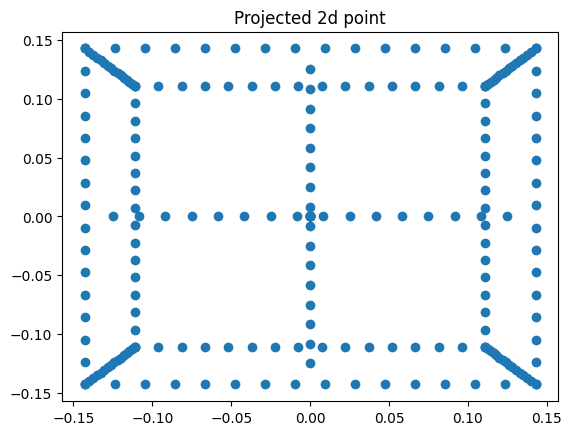

In [228]:
Q = box3d() 
K = np.eye(3)
R = np.eye(3)
t = np.array([0,0,4])

p_h = project_points(K,R,t,Q)

x,y = p_h

plt.scatter(x,y)
plt.title("Projected 2d point")

In [223]:
from sympy import Matrix, symbols, init_printing

# Enable pretty-printing in the output
init_printing(use_unicode=True)

# Define symbols (if your matrix involves symbolic expressions)
a, b, c, d = symbols('a b c d')

# Define your matrix
M = Matrix(p_h)
# Display the matrix
M


⎡-0.142857142857143  -0.123809523809524  -0.104761904761905  -0.08571428571428
⎢                                                                             
⎣-0.142857142857143  -0.142857142857143  -0.142857142857143  -0.14285714285714

57  -0.0666666666666667  -0.0476190476190476  -0.0285714285714286  -0.00952380
                                                                              
3   -0.142857142857143   -0.142857142857143   -0.142857142857143    -0.1428571

952380952  0.00952380952380952  0.0285714285714286  0.0476190476190476  0.0666
                                                                              
42857143   -0.142857142857143   -0.142857142857143  -0.142857142857143  -0.142

666666666667  0.0857142857142857  0.104761904761905   0.123809523809524   0.14
                                                                              
857142857143  -0.142857142857143  -0.142857142857143  -0.142857142857143  -0.1

2857142857143   -0.142857142857143  -0.142857142

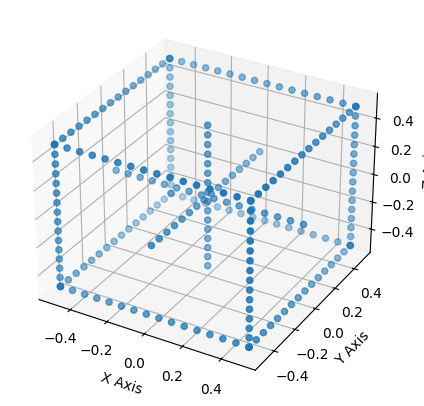

In [224]:


x,y,z = box3d()
def plot3d(x,y,z):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d') # This creates a 3D plotting context
    ax.scatter(x, y, z) 

    # Setting labels for better understanding
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    plt.show()


plot3d(x,y,z)

Text(0.5, 1.0, 'Projected 2d point')

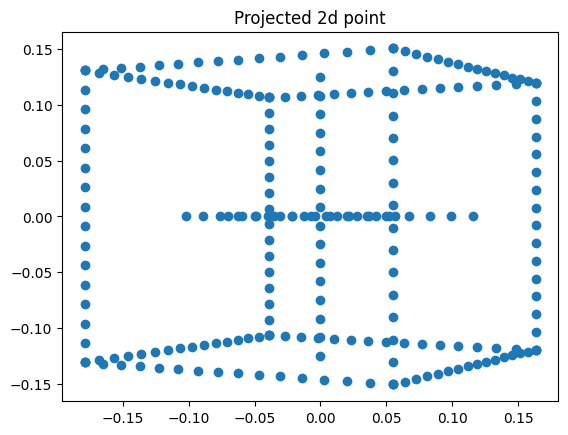

In [234]:
theta = np.radians(30)
R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
p_h = project_points(K,R,t,Q)

x,y = p_h

plt.scatter(x,y)
plt.title("Projected 2d point")
